<a href="https://colab.research.google.com/github/jongheonleee/Artificial_Intelligence/blob/master/ch15_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from IPython.display import Image

## 합성곱 신경망의 구성 요소

<br>

### CNN과 특성 계층 학습

In [2]:
Image(url='https://git.io/JL5O3', width=700)

## 이산 합성곱 수행

<br>


### 1차원 이산 합성곱 수행

In [3]:
Image(url='https://git.io/JL5On', width=700)

In [4]:
Image(url='https://git.io/JL5O8', width=700)


### 출력 특성 맵의 크기를 조절하기 위해 입력에 패딩하기

In [5]:
Image(url='https://git.io/JL5Ow', width=700)

In [6]:
# 합성곱 출력 크기 계산

import tensorflow as tf
import numpy as np

def convld(x, w, p=0, s=1):
  w_rot = np.array(w[::-1])
  x_padded = np.array(x)

  if p > 0:
    zero_pad = np.zeros(shape=p)
    x_padded = np.concatenate(
        [zero_pad, x_padded, zero_pad]
    )
  
  res = []

  for i in range(0, int((len(x_padded) - len(w_rot)) / s) + 1, s):
    res.append(np.sum(
        x_padded[i:i+w_rot.shape[0]] * w_rot
    ))

  return np.array(res)

x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Convld 구현 : ',
      convld(x, w, p=2, s=1))

print('넘파이 결과 : ',
      np.convolve(x, w, mode='same'))




Convld 구현 :  [ 5. 14. 16. 26. 24. 34. 19. 22.]
넘파이 결과 :  [ 5 14 16 26 24 34 19 22]


In [7]:

Image(url='https://git.io/JL5OP', width=700)

In [8]:

Image(url='https://git.io/JL5OD', width=600)

In [9]:
Image(url='https://git.io/JL5OS', width=800)

In [10]:

import scipy.signal


def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0],
    p[1]:p[1]+X_orig.shape[1]] = X_orig

    res = []
    for i in range(0, int((X_padded.shape[0] - 
                           W_rot.shape[0])/s[0])+1, s[0]):
        res.append([])
        for j in range(0, int((X_padded.shape[1] - 
                               W_rot.shape[1])/s[1])+1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0],
                             j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return(np.array(res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print('Conv2d 구현:\n',
    conv2d(X, W, p=(1, 1), s=(1, 1)))


print('싸이파이 결과:\n',
    scipy.signal.convolve2d(X, W, mode='same'))

Conv2d 구현:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
싸이파이 결과:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


## 서브 샘플링

In [11]:

Image(url='https://git.io/JL5OH', width=700)

## 기본 구성 요소를 사용하여 심층 합성곱 신경망 구성

<br>

### 여러 개의 입력 또는 컬러 채널 다루기

In [12]:
Image(url='https://git.io/JL5O5', width=800)

In [13]:
# 팁: 이미지 파일 읽기
# 코랩에서 실행할 경우 이미지를 먼저 다운로드합니다
!wget https://git.io/JL5Ob -O example-image.png

--2022-08-23 03:39:41--  https://git.io/JL5Ob
Resolving git.io (git.io)... 140.82.113.21
Connecting to git.io (git.io)|140.82.113.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch15/example-image.png [following]
--2022-08-23 03:39:41--  https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch15/example-image.png
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch15/example-image.png [following]
--2022-08-23 03:39:41--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch15/example-image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.

In [14]:
import tensorflow as tf


img_raw = tf.io.read_file('example-image.png')
img = tf.image.decode_image(img_raw)
print('이미지 크기:', img.shape)
print('채널 개수:', img.shape[2])
print('이미지 데이터 타입:', img.dtype)
print(img[100:102, 100:102, :])

이미지 크기: (252, 221, 3)
채널 개수: 3
이미지 데이터 타입: <dtype: 'uint8'>
tf.Tensor(
[[[179 134 110]
  [182 136 112]]

 [[180 135 111]
  [182 137 113]]], shape=(2, 2, 3), dtype=uint8)


In [15]:
import imageio


img = imageio.imread('example-image.png')
print('이미지 크기:', img.shape)
print('채널 개수:', img.shape[2])
print('이미지 데이터 타입:', img.dtype)
print(img[100:102, 100:102, :])

이미지 크기: (252, 221, 3)
채널 개수: 3
이미지 데이터 타입: uint8
[[[179 134 110]
  [182 136 112]]

 [[180 135 111]
  [182 137 113]]]


In [16]:
# 코랩에서 실행할 경우 이미지를 먼저 다운로드합니다
!wget https://git.io/JL5Op -O example-image-gray.png

--2022-08-23 03:39:42--  https://git.io/JL5Op
Resolving git.io (git.io)... 140.82.113.21
Connecting to git.io (git.io)|140.82.113.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch15/example-image-gray.png [following]
--2022-08-23 03:39:42--  https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch15/example-image-gray.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch15/example-image-gray.png [following]
--2022-08-23 03:39:42--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch15/example-image-gray.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.1

In [17]:
img_raw = tf.io.read_file('example-image-gray.png')
img = tf.image.decode_image(img_raw)
tf.print('랭크:', tf.rank(img))
tf.print('크기:', img.shape)

랭크: 3
크기: TensorShape([252, 221, 1])


In [18]:
img = imageio.imread('example-image-gray.png')
tf.print('랭크:', tf.rank(img))
tf.print('크기:', img.shape)

img_reshaped = tf.reshape(img, (img.shape[0], img.shape[1], 1))
tf.print('새로운 크기:', img_reshaped.shape)

랭크: 2
크기: (252, 221)
새로운 크기: TensorShape([252, 221, 1])


In [19]:
from tensorflow import keras

conv_layer = keras.layers.Conv2D(
    filters=16,
    kernel_size=(3, 3),
    kernel_regularizer = keras.regularizers.l2(0.001)
)

fc_layer = keras.layers.Dense(
    units=16,
    kernel_regularizer = keras.regularizers.l2(0.001)
)


## 드롭아웃으로 신경망 규제

In [20]:

Image(url='https://git.io/JL5Oh', width=700)

In [21]:
from tensorflow import keras


conv_layer = keras.layers.Conv2D(
    filters=16, kernel_size=(3, 3),
    kernel_regularizer=keras.regularizers.l2(0.001))

fc_layer = keras.layers.Dense(
    units=16, kernel_regularizer=keras.regularizers.l2(0.001))

In [22]:
Image(url='https://git.io/JL53f', width=800)

In [23]:
from distutils.version import LooseVersion as Version


####### 이진 크로스 엔트로피
bce_probas = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)

logits = tf.constant([0.8])
print(logits)
probas = tf.keras.activations.sigmoid(logits)
print(probas)

tf.print(
    'BCE (확률): {:.4f}'.format(
    bce_probas(y_true=[1], y_pred=probas)),
    '(로짓): {:.4f}'.format(
    bce_logits(y_true=[1], y_pred=logits)))


####### 범주형 크로스 엔트로피
cce_probas = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False)
cce_logits = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True)

logits = tf.constant([[1.5, 0.8, 2.1]])
print(logits)
probas = tf.keras.activations.softmax(logits)
print(probas)

if Version(tf.__version__) >= '2.3.0':
    tf.print(
        'CCE (확률): {:.4f}'.format(
        cce_probas(y_true=[[0, 0, 1]], y_pred=probas)),
        '(로짓): {:.4f}'.format(
        cce_logits(y_true=[[0, 0, 1]], y_pred=logits)))
else:
    tf.print(
        'CCE (확률): {:.4f}'.format(
        cce_probas(y_true=[0, 0, 1], y_pred=probas)),
        '(로짓): {:.4f}'.format(
        cce_logits(y_true=[0, 0, 1], y_pred=logits)))

####### 희소 범주형 크로스 엔트로피
sp_cce_probas = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False)
sp_cce_logits = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)

tf.print(
    'Sparse CCE (확률): {:.4f}'.format(
    sp_cce_probas(y_true=[2], y_pred=probas)),
    '(로짓): {:.4f}'.format(
    sp_cce_logits(y_true=[2], y_pred=logits)))

tf.Tensor([0.8], shape=(1,), dtype=float32)
tf.Tensor([0.6899744], shape=(1,), dtype=float32)
BCE (확률): 0.3711 (로짓): 0.3711
tf.Tensor([[1.5 0.8 2.1]], shape=(1, 3), dtype=float32)
tf.Tensor([[0.30132246 0.1496323  0.54904526]], shape=(1, 3), dtype=float32)
CCE (확률): 0.5996 (로짓): 0.5996
Sparse CCE (확률): 0.5996 (로짓): 0.5996


### 텐서플로를 사용하여 심층 합성곱 신경망 구현

<br>


### 다층 CNN 구조

In [24]:

Image(url='https://git.io/JL53U', width=800)

### 데이터 적재와 전처리


In [25]:
import tensorflow_datasets as tfds
import pandas as pd

import matplotlib.pyplot as plt


In [26]:
## MNIST 데이터셋

import tensorflow_datasets as tfds
# 데이터 적재

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
mnist_train_orig = datasets['train']
mnist_test_orig = datasets['test']



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [27]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/ 255.0,
                  tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/ 255.0,
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)
mnist_train = mnist_train.shuffle(buffer_size = BUFFER_SIZE,
                                  reshuffle_each_iteration=False)
mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)


텐서플로 케라스 API를 사용해 CNN 구현하기<br>
케라스에서 CNN 층 설정하기<br>
 - Conv2D: tf.keras.layers.Conv2D<br>

    > - filters<br>
    > - kernel_size<br>
    > - strides<br>
    > - padding<br>

<br>

 - MaxPool2D: tf.keras.layers.MaxPool2D<br>
 
    > - pool_size
    > - strides
    > - padding

<br>

 - Dropout tf.keras.layers.Dropout2D
    > - rate<br>

<br>

### 케라스로 CNN 구성하기

In [28]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_l', activation='relu'
))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_l'
))

model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

In [29]:
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 7, 7, 64])

In [36]:
model.add(tf.keras.layers.Flatten())
    
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 3136])

In [37]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'
))

model.add(tf.keras.layers.Dropout(
    rate=0.5
))

model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'
))

In [38]:
tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 10])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_l (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_l (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0

In [40]:

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS, 
                    validation_data=mnist_valid, 
                    shuffle=True)

Epoch 1/20
782/782 [==============================] - 210s 263ms/step - loss: 0.1373 - accuracy: 0.9573 - val_loss: 0.0460 - val_accuracy: 0.9860
Epoch 2/20
782/782 [==============================] - 213s 271ms/step - loss: 0.0450 - accuracy: 0.9860 - val_loss: 0.0395 - val_accuracy: 0.9882
Epoch 3/20
782/782 [==============================] - 172s 218ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 4/20
782/782 [==============================] - 140s 178ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0387 - val_accuracy: 0.9889
Epoch 5/20
782/782 [==============================] - 141s 179ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0381 - val_accuracy: 0.9900
Epoch 6/20
782/782 [==============================] - 140s 178ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0380 - val_accuracy: 0.9900
Epoch 7/20
782/782 [==============================] - 141s 179ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0443 -

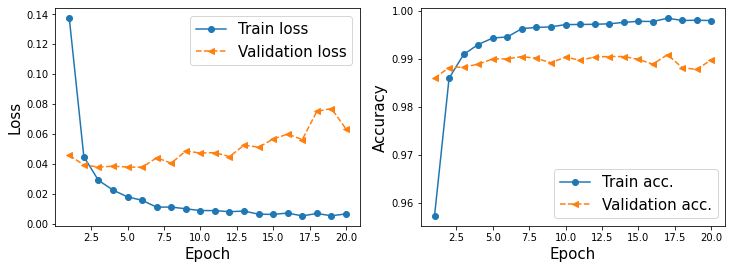

In [43]:
import matplotlib.pyplot as plt

hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [48]:
test_results = model.evaluate(mnist_test.batch(20))
print('\n테스트 정확도 {:.2f}'.format(test_results[1] * 100))

500/500 [==============================] - 9s 18ms/step - loss: 0.0409 - accuracy: 0.9923

테스트 정확도 99.23


TensorShape([12, 10])
tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


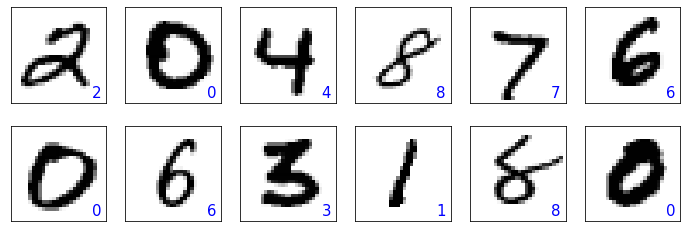

In [50]:

batch_test = next(iter(mnist_test.batch(12)))

preds = model(batch_test[0])

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
#plt.savefig('images/15_13.png', dpi=300)
plt.show()

In [46]:
import os

if not os.path.exists('models'):
    os.mkdir('models')


model.save('models/mnist-cnn.h5')